In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from utils import load_series_dfs
from pathlib import Path
import time
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os, re, time
import pickle
import json, numpy as np, pandas as pd
from tslearn.metrics import cdist_dtw
from tslearn.preprocessing import TimeSeriesResampler

In [2]:
with open("../data/series_by_bin.pkl", "rb") as f:
    series_by_bin_loaded = pickle.load(f)

In [3]:
series_by_bin_loaded.keys()

dict_keys(['0–5%', '10–15%', '5–10%', '20–25%', '>30%', '25–30%'])

In [4]:
assignment_auto = pd.read_csv("../data/assignments/assignment_auto.csv")

assignment_auto = assignment_auto [['bin', 'series_key', 'assigned_medoid', 'distance']]

assignment_auto.head()

,bin,series_key,assigned_medoid,distance
0,0–5%,FL_00024360.PLAN.MengeHH.2,CV_00003432.PLAN.Menge,3.791466e+01
1,0–5%,FL_00024360.PLAN.MengeGA,FL_00024360.PLAN.MengeGA,5.527229e-07
2,0–5%,FL_00352244.PLAN.MengeKW,CV_00003432.PLAN.Menge,1.212620e+01
3,0–5%,FL_00352244.PLAN.MengeGA,CV_00003432.PLAN.Menge,2.005376e+01
4,0–5%,FL_00352251.PLAN.MengeGA,CV_00003432.PLAN.Menge,1.880089e+01


In [5]:
assignment_fixed = pd.read_csv("../data/assignments/assignment_minimaler_rmse.csv")

assignment_fixed = assignment_fixed[['bin', 'series_key', 'assigned_medoid', 'distance']]

assignment_fixed.head()

,bin,series_key,assigned_medoid,distance
0,0–5%,FL_00024360.PLAN.MengeHH.2,CV_00003432.PLAN.Menge,3.791466e+01
1,0–5%,FL_00024360.PLAN.MengeGA,FL_00024360.PLAN.MengeGA,5.527229e-07
2,0–5%,FL_00352244.PLAN.MengeKW,CV_00003432.PLAN.Menge,1.212620e+01
3,0–5%,FL_00352244.PLAN.MengeGA,CV_00003432.PLAN.Menge,2.005376e+01
4,0–5%,FL_00352251.PLAN.MengeGA,CV_00003432.PLAN.Menge,1.880089e+01


In [10]:
series_by_bin_loaded['0–5%'][series_key][series_by_bin_loaded['0–5%'][series_key].isna().any(axis=1)]

,consumption,w_tl,w_rf,w_ff,w_ffx,w_cglo,w_so_h,w_rr,w_rrm,w_tb10,w_tb20,CEGH_WAP,THE_WAP
von,,,,,,,,,,,,,
2015-03-29 02:00:00,NaN,6.2,96.0,1.4,4.9,0.0,0.0,0.3,59.0,6.7,7.5,22.68,22.32
2016-03-27 02:00:00,NaN,-1.2,97.0,0.0,0.8,0.0,0.0,0.0,0.0,4.4,6.1,12.63,12.13
2017-03-26 02:00:00,NaN,4.0,76.0,0.4,2.5,0.0,0.0,0.0,0.0,6.7,7.8,16.19,15.53
2018-03-25 02:00:00,NaN,-1.3,85.0,0.3,1.2,0.0,0.0,0.0,0.0,2.7,3.8,19.14,19.64


In [16]:
df.columns

Index(['consumption', 'w_tl', 'w_rf', 'w_ff', 'w_ffx', 'w_cglo', 'w_so_h',
       'w_rr', 'w_rrm', 'w_tb10', 'w_tb20', 'CEGH_WAP', 'THE_WAP', 'hour',
       'weekday', 'month', 'is_weekend'],
      dtype='object')

In [19]:
df[df.isna().any(axis=1)]

,consumption,w_tl,w_rf,w_ff,w_ffx,w_cglo,w_so_h,w_rr,w_rrm,w_tb10,w_tb20,CEGHIX,TRP_NCG,hour,weekday,month,is_weekend
2015-03-29 02:00:00,NaN,2.5,76.0,2.2,4.2,0.0,0.0,0.0,NaN,6.4,7.0,22.68,22.32,2,6,3,1
2016-03-27 02:00:00,NaN,2.4,90.0,1.1,2.4,0.0,0.0,0.0,NaN,6.6,6.9,12.63,12.13,2,6,3,1
2017-03-26 02:00:00,NaN,7.0,63.0,2.9,5.9,0.0,0.0,0.0,NaN,7.8,7.8,16.19,15.53,2,6,3,1
2018-02-01 00:00:00,49.367,2.2,92.0,1.2,4.5,0.0,0.0,0.0,NaN,4.1,3.9,17.40,17.40,0,3,2,0
2018-02-01 01:00:00,49.011,2.2,92.0,1.2,4.5,0.0,0.0,0.0,NaN,4.1,3.9,17.40,17.40,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,47.458,2.2,92.0,1.2,4.5,0.0,0.0,0.0,NaN,4.1,3.9,23.10,23.12,19,0,12,0
2018-12-31 20:00:00,47.717,2.2,92.0,1.2,4.5,0.0,0.0,0.0,NaN,4.1,3.9,23.10,23.12,20,0,12,0
2018-12-31 21:00:00,47.114,2.2,92.0,1.2,4.5,0.0,0.0,0.0,NaN,4.1,3.9,23.10,23.12,21,0,12,0
2018-12-31 22:00:00,47.216,2.2,92.0,1.2,4.5,0.0,0.0,0.0,NaN,4.1,3.9,23.10,23.12,22,0,12,0


In [12]:
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
from typing import Dict, Tuple, List

# === SETTINGS (bitte ggf. anpassen)
BASE_DIR  = Path("../data")
MODELS_DIR= BASE_DIR / "sarimax_models"
ASSIGN_FILE = BASE_DIR / "assignments" / "assignment_auto.csv"
OUT_DIR  = BASE_DIR / "experiment_results"
FREQ     = "h"
TARGET_COL = "consumption"
GAP_WINDOWS = {"short6h":(3,6), "day24h":(2,24), "long72h":(1,72)}
RANDOM_SEED = 42

def ensure_outdir(p: Path):
    p.mkdir(parents=True, exist_ok=True)

def load_assignments_csv(p: Path) -> pd.DataFrame:
    if not p.exists():
        raise FileNotFoundError(f"Assignment-Datei fehlt: {p}")
    df = pd.read_csv(p)
    required = {"series_key","assigned_medoid","bin"}
    if not required.issubset(df.columns):
        raise KeyError(f"Assignment-Spalten fehlen: {required - set(df.columns)}")
    return df

def model_path_for(medoid: str, variant: str) -> Path:
    return MODELS_DIR / f"{medoid}__{variant}.pkl"

def load_model_safe(medoid: str, variant: str):
    p = model_path_for(medoid, variant)
    if not p.exists():
        raise FileNotFoundError(f"Modell fehlt: {p.name}")
    with open(p, "rb") as f:
        return pickle.load(f)

def select_exog(df: pd.DataFrame, features: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    missing = [c for c in features if c not in df.columns]
    return df[[c for c in features if c in df.columns]], missing

def metrics(y_true: pd.Series, y_pred: pd.Series) -> Dict[str, float]:
    mask = y_true.notna() & y_pred.notna()
    if mask.sum() == 0:
        return {"rmse": np.nan, "mae": np.nan, "mape": np.nan}
    e = (y_true[mask] - y_pred[mask])
    rmse = float(np.sqrt(np.mean(np.square(e))))
    mae  = float(np.mean(np.abs(e)))
    denom = y_true[mask].replace(0, np.nan)
    mape = float(np.mean(np.abs(e / denom))) * 100.0
    return {"rmse": rmse, "mae": mae, "mape": mape}

def random_gap_mask(idx: pd.DatetimeIndex, n_windows: int, win_len_hours: int, rng: np.random.Generator) -> pd.Series:
    mask = pd.Series(False, index=idx)
    if len(idx) < win_len_hours:
        return mask
    positions = np.arange(0, len(idx) - win_len_hours + 1)
    rng.shuffle(positions)
    starts = []
    for pos in positions:
        if all(abs(pos - s) >= win_len_hours for s in starts):
            starts.append(pos)
            if len(starts) >= n_windows:
                break
    for s in starts:
        sel = idx[s : s + win_len_hours]
        mask.loc[sel] = True
    return mask

def inject_gaps(series_df: pd.DataFrame, patterns: Dict[str, Tuple[int, int]], rng: np.random.Generator) -> Dict[str, pd.Series]:
    idx = series_df.index
    return {name: random_gap_mask(idx, n, L, rng) for name, (n, L) in patterns.items()}

def impute_with_sarimax(res, endog: pd.Series, exog: pd.DataFrame) -> pd.Series:
    start = endog.index.min()
    end   = endog.index.max()
    pred  = res.get_prediction(start=start, end=end, exog=exog).predicted_mean
    out   = endog.copy()
    needs = endog.isna()
    out.loc[needs] = pred.loc[needs]
    return out

def run_experiments_with_diagnostics(series_by_bin_loaded: Dict[str, Dict[str, pd.DataFrame]]):
    rng = np.random.default_rng(RANDOM_SEED)
    ensure_outdir(OUT_DIR)

    # 1) Assignments
    try:
        assignments = load_assignments_csv(ASSIGN_FILE)
    except Exception as e:
        print(f"[FATAL] {e}")
        return

    assign_lookup = assignments.set_index("series_key")["assigned_medoid"].to_dict()
    bin_lookup    = assignments.set_index("series_key")["bin"].to_dict()

    # Varianten
    variants = list(FEATURE_SETS.keys())

    results_rows = []
    skip_rows = []
    first_success_case = None
    total_candidates = 0

    for bin_key, series_map in series_by_bin_loaded.items():
        for series_key, df_raw in series_map.items():
            total_candidates += 1

            # 0) Target existiert?
            if TARGET_COL not in df_raw.columns:
                skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": None, "gap_pattern": None,
                                  "stage": "target_check", "reason": f"Target '{TARGET_COL}' fehlt"})
                continue

            # 1) Auto-Prep für JEDE Serie (kein Target-Interpolieren; Exogs auffüllen)
            try:
                df = prepare_series_for_imputation(
                    df_raw=df_raw,
                    target_col=TARGET_COL,
                    exog_cols=EXOG_UNION_TO_FILL,
                    freq=FREQ
                )
            except Exception as e:
                skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": None, "gap_pattern": None,
                                  "stage": "prep", "reason": str(e)})
                continue

            # 2) Medoid
            medoid = assign_lookup.get(series_key)
            if medoid is None:
                skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": None, "gap_pattern": None,
                                  "stage": "assignment", "reason": "kein assigned_medoid"})
                continue

            # 3) synthetische Lücken
            gap_masks = inject_gaps(df, GAP_WINDOWS, rng=rng)

            # 4) Varianten
            for variant in variants:
                feats = FEATURE_SETS[variant]

                # 4a) Modell laden
                try:
                    res = load_model_safe(medoid, variant)
                except Exception as e:
                    skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": None,
                                      "stage": "model_load", "reason": str(e)})
                    continue

                # 4b) Exogene zusammenstellen
                exog_full, missing = select_exog(df, feats)
                if missing:
                    skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": None,
                                      "stage": "exog_missing", "reason": f"fehlen: {missing}"})
                    # wenn gar keine exog übrig bleibt, überspringen
                    if exog_full.shape[1] == 0:
                        continue

                # 4c) je Gap-Pattern
                for gap_name, mask in gap_masks.items():
                    y_true = df[TARGET_COL].copy()
                    y_nan  = y_true.copy()
                    # setze synthetische NaNs
                    y_nan.loc[mask[mask].index] = np.nan

                    if mask.sum() == 0:
                        skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": gap_name,
                                          "stage": "gap_empty", "reason": "kein synthetischer Gap möglich"})
                        continue

                    # 4d) Imputation
                    try:
                        y_imp = impute_with_sarimax(res, y_nan, exog_full)
                    except Exception as e:
                        skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": gap_name,
                                          "stage": "predict", "reason": str(e)})
                        continue

                    # 4e) Metriken (nur im Gap)
                    eval_mask = mask & y_true.notna()
                    m = metrics(y_true[eval_mask], y_imp[eval_mask])

                    results_rows.append({
                        "bin": bin_key,
                        "series_key": series_key,
                        "assignment_bin": bin_lookup.get(series_key, np.nan),
                        "assigned_medoid": medoid,
                        "variant": variant,
                        "features": ",".join(feats),
                        "gap_pattern": gap_name,
                        "n_eval_points": int(eval_mask.sum()),
                        **m
                    })

                    if first_success_case is None:
                        first_success_case = (series_key, bin_key, variant, gap_name)

    # 5) Schreiben
    ensure_outdir(OUT_DIR)
    debug_path = OUT_DIR / "debug_skips.csv"
    pd.DataFrame(skip_rows).to_csv(debug_path, index=False)

    if results_rows:
        res_df = pd.DataFrame(results_rows)
        res_path = OUT_DIR / "experiment_summary.csv"
        res_df.to_csv(res_path, index=False)
        print(f"[OK] Ergebnisse: {res_path}")
        print(f"[OK] Skip-Log:   {debug_path}")
    else:
        print("[WARN] Keine Ergebnisse erzeugt.")
        print(f"[INFO] Skip-Log: {debug_path}")

    if first_success_case:
        sk, bk, var, gp = first_success_case
        print(f"[SMOKE] Erste erfolgreiche Kombination: {sk} | {bk} | {var} | {gp}")
    else:
        print("[SMOKE] Keine erfolgreiche Kombination gefunden — bitte debug_skips.csv ansehen.")


In [13]:
run_experiments_with_diagnostics(series_by_bin_loaded)

[WARN] Keine Ergebnisse erzeugt.
[INFO] Skip-Log: ..\data\experiment_results\debug_skips.csv
[SMOKE] Keine erfolgreiche Kombination gefunden — bitte debug_skips.csv ansehen.


In [19]:
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
from typing import Dict, Tuple, List, Optional

# =========================
# SETTINGS
# =========================
BASE_DIR   = Path("../data")
MODELS_DIR = BASE_DIR / "sarimax_models"
ASSIGN_FILE= BASE_DIR / "assignments" / "assignment_auto.csv"
OUT_DIR    = BASE_DIR / "experiment_results"
FREQ       = "h"   # statt 'H'
TARGET_COL = "consumption"
GAP_WINDOWS= {"short6h": (3, 6), "day24h": (2, 24), "long72h": (1, 72)}
RANDOM_SEED= 42

# Deine Feature-Sets (Zeitfeatures bleiben hier enthalten; wir erzeugen sie deterministisch)
FEATURE_SETS = {
    "rmse_toleranz": ['hour', 'w_tl', 'w_ff', 'w_tb10', 'w_tb20', 'CEGH_WAP', 'THE_WAP'],
    "bester_score":  ['w_tl','w_tb10'],
    "minimaler_rmse":['hour', 'weekday', 'month', 'is_weekend', 'w_tl', 'w_rf',
                      'w_ff', 'w_ffx', 'w_cglo', 'w_so_h', 'w_rr',
                      'w_tb10', 'w_tb20', 'CEGH_WAP', 'THE_WAP']  # alle, kein Drop
}

TIME_FEATS = {"hour","weekday","month","is_weekend"}  # werden automatisch ergänzt

# =========================
# HELPERS
# =========================
def ensure_outdir(p: Path):
    p.mkdir(parents=True, exist_ok=True)

def load_assignments_csv(p: Path) -> pd.DataFrame:
    if not p.exists():
        raise FileNotFoundError(f"Assignment-Datei fehlt: {p}")
    df = pd.read_csv(p)
    required = {"series_key","assigned_medoid","bin"}
    if not required.issubset(df.columns):
        raise KeyError(f"Assignment-Spalten fehlen: {required - set(df.columns)}")
    return df

def model_path_for(medoid: str, variant: str) -> Path:
    return MODELS_DIR / f"{medoid}__{variant}.pkl"

def load_model_safe(medoid: str, variant: str):
    p = model_path_for(medoid, variant)
    if not p.exists():
        raise FileNotFoundError(f"Modell fehlt: {p.name}")
    with open(p, "rb") as f:
        return pickle.load(f)

def select_exog(df: pd.DataFrame, features: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    missing = [c for c in features if c not in df.columns]
    return df[[c for c in features if c in df.columns]], missing

def metrics(y_true: pd.Series, y_pred: pd.Series) -> Dict[str, float]:
    mask = y_true.notna() & y_pred.notna()
    if mask.sum() == 0:
        return {"rmse": np.nan, "mae": np.nan, "mape": np.nan}
    e = (y_true[mask] - y_pred[mask])
    rmse = float(np.sqrt(np.mean(np.square(e))))
    mae  = float(np.mean(np.abs(e)))
    denom = y_true[mask].replace(0, np.nan)
    mape = float(np.mean(np.abs(e / denom))) * 100.0
    return {"rmse": rmse, "mae": mae, "mape": mape}

def random_gap_mask(idx: pd.DatetimeIndex, n_windows: int, win_len_hours: int, rng: np.random.Generator) -> pd.Series:
    mask = pd.Series(False, index=idx)
    if len(idx) < win_len_hours:
        return mask
    positions = np.arange(0, len(idx) - win_len_hours + 1)
    rng.shuffle(positions)
    starts = []
    for pos in positions:
        if all(abs(pos - s) >= win_len_hours for s in starts):
            starts.append(pos)
            if len(starts) >= n_windows:
                break
    for s in starts:
        sel = idx[s : s + win_len_hours]
        mask.loc[sel] = True
    return mask

def inject_gaps(series_df: pd.DataFrame, patterns: Dict[str, Tuple[int, int]], rng: np.random.Generator) -> Dict[str, pd.Series]:
    idx = series_df.index
    return {name: random_gap_mask(idx, n, L, rng) for name, (n, L) in patterns.items()}

def get_model_index(res) -> pd.DatetimeIndex:
    """
    Versucht den Pandas-Index zu ziehen, mit dem das Modell trainiert wurde.
    """
    # Standardweg, wenn mit Pandas-Serie gefittet wurde:
    idx = getattr(res.model, "_index", None)
    if isinstance(idx, pd.DatetimeIndex):
        return idx

    # Fallback (selten benötigt): aus data.dates + nobs rekonstruieren
    dates = getattr(res, "data", None)
    if dates is not None and getattr(dates, "dates", None) is not None:
        start = pd.to_datetime(res.data.dates[0])
        # Frequenz raten: zuerst aus endog/row_labels, sonst 'H'
        freq = None
        try:
            freq = getattr(res.model.data.row_labels, "freqstr", None)
        except Exception:
            pass
        if freq is None:
            freq = "H"
        return pd.date_range(start=start, periods=int(res.nobs), freq=freq)

    raise ValueError("Konnte den Trainingsindex des Modells nicht ermitteln.")

def impute_with_sarimax_aligned(res, endog: pd.Series, exog: pd.DataFrame) -> pd.Series:
    """
    Imputiert NaNs in 'endog', indem Prediction des SARIMAX verwendet wird.
    Achtung: endog & exog werden auf den Modell-Trainingsindex ausgerichtet,
    damit Shapes exakt passen (sonst Fehler wie 'Required (8760, k), got (35058, k)').
    """
    # 0) Modell-Index holen und auf diesen reindexen
    model_idx = get_model_index(res)  # z.B. Länge 8760
    # Kopien ausrichten (füllt fehlende Stempel mit NaN)
    y_aligned = endog.reindex(model_idx)
    exog_aligned = exog.reindex(model_idx)

    # 1) Exogene ggf. auffüllen (nur exog, NIE das Target!)
    if exog_aligned.isna().any().any():
        exog_aligned = exog_aligned.ffill().bfill()

    # 2) Prediction GENAU über die Modellspanne
    start = model_idx[0]
    end = model_idx[-1]
    pred = res.get_prediction(start=start, end=end, exog=exog_aligned).predicted_mean

    # 3) Output auf ORIGINALLÄNGE zurückbringen und nur dort füllen, wo NaN war
    out = endog.copy()
    needs = out.isna()
    # nur die Schnittmenge der Indizes füllen
    common = out.index.intersection(model_idx)
    fill_mask = needs.loc[common]
    out.loc[fill_mask.index] = pred.loc[fill_mask.index]

    return out
def prepare_series_for_imputation(
    df_raw: pd.DataFrame,
    target_col: str = "consumption",
    exog_cols: Optional[List[str]] = None,
    freq: str = "h",
) -> pd.DataFrame:
    """
    - Index -> datetime, Duplikate raus, sort
    - Frequenz vereinheitlichen (freq), Target bleibt NaN (NICHT interpolieren)
    - Exogene 'sanft' auffüllen (ffill/bfill + time-interpolate), Zeitfeatures NICHT auffüllen
    - Zeitfeatures (hour, weekday, month, is_weekend) ergänzen (falls fehlen)
    """
    df = df_raw.copy()

    # Index normalisieren (naiv, ggf. TZ entfernen)
    idx = pd.to_datetime(df.index)
    if getattr(idx, "tz", None) is not None:
        idx = idx.tz_convert("UTC").tz_localize(None)
    df.index = idx

    # Duplikate raus + sort
    df = df[~df.index.duplicated(keep="first")].sort_index()

    # Frequenz vereinheitlichen -> erzeugt ggf. NaN im Target (so gewollt)
    df = df.asfreq(freq)

    # Zeitfeatures sicherstellen (nicht doppelt anlegen)
    if "hour" not in df.columns:
        df["hour"] = df.index.hour
    if "weekday" not in df.columns:
        df["weekday"] = df.index.weekday
    if "month" not in df.columns:
        df["month"] = df.index.month
    if "is_weekend" not in df.columns:
        df["is_weekend"] = (df.index.weekday >= 5).astype(int)
    else:
        # sicherheitshalber in int casten
        df["is_weekend"] = df["is_weekend"].astype(int, errors="ignore")

    # Exogene bestimmen: alles außer Target und Zeitfeatures
    if exog_cols is None:
        exog_cols = [c for c in df.columns if c not in {target_col, *TIME_FEATS}]

    exog_cols_existing = [c for c in exog_cols if c in df.columns]
    if exog_cols_existing:
        df[exog_cols_existing] = (
            df[exog_cols_existing]
            .ffill().bfill()
            .interpolate(method="time", limit_direction="both")
        )

    return df

# =========================
# MAIN EXPERIMENT RUNNER
# =========================
def run_experiments_with_diagnostics(series_by_bin_loaded: Dict[str, Dict[str, pd.DataFrame]]):
    print("[PATH] CWD:      ", Path.cwd())
    print("[PATH] BASE_DIR: ", BASE_DIR.resolve())
    print("[PATH] OUT_DIR:  ", OUT_DIR.resolve())
    print("[PATH] ASSIGN:   ", ASSIGN_FILE.resolve(), "exists:", ASSIGN_FILE.exists())

    rng = np.random.default_rng(RANDOM_SEED)
    ensure_outdir(OUT_DIR)

    # 1) Assignments
    try:
        assignments = load_assignments_csv(ASSIGN_FILE)
    except Exception as e:
        print(f"[FATAL] {e}")
        return

    assign_lookup = assignments.set_index("series_key")["assigned_medoid"].to_dict()
    bin_lookup    = assignments.set_index("series_key")["bin"].to_dict()

    # Varianten
    variants = list(FEATURE_SETS.keys())
    print("[INFO] Varianten:", variants)

    results_rows = []
    skip_rows = []
    first_success_case = None
    total_candidates = 0

    for bin_key, series_map in series_by_bin_loaded.items():
        for series_key, df_raw in series_map.items():
            total_candidates += 1

            # 0) Target existiert?
            if TARGET_COL not in df_raw.columns:
                skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": None, "gap_pattern": None,
                                  "stage": "target_check", "reason": f"Target '{TARGET_COL}' fehlt"})
                continue

            # 1) Auto-Prep (kein Target-Interpolieren; Exogs auffüllen)
            try:
                df = prepare_series_for_imputation(
                    df_raw=df_raw,
                    target_col=TARGET_COL,
                    exog_cols=None,   # Auto: alle Nicht-Target- & Nicht-Zeitfeatures auffüllen
                    freq=FREQ
                )
            except Exception as e:
                skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": None, "gap_pattern": None,
                                  "stage": "prep", "reason": str(e)})
                continue

            # 2) Medoid
            medoid = assign_lookup.get(series_key)
            if medoid is None:
                skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": None, "gap_pattern": None,
                                  "stage": "assignment", "reason": "kein assigned_medoid"})
                continue

            # 3) synthetische Lücken
            gap_masks = inject_gaps(df, GAP_WINDOWS, rng=rng)

            # 4) Varianten
            for variant in variants:
                feats = FEATURE_SETS[variant]

                # 4a) Modell laden
                try:
                    res = load_model_safe(medoid, variant)
                except Exception as e:
                    skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": None,
                                      "stage": "model_load", "reason": str(e)})
                    continue

                # 4b) Exogene zusammenstellen (genau die Features der Variante)
                exog_full, missing = select_exog(df, feats)
                if missing:
                    skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": None,
                                      "stage": "exog_missing", "reason": f"fehlen: {missing}"})
                    if exog_full.shape[1] == 0:
                        continue

                # OPTIONAL aber nützlich: Abgleich mit Trainings-Exogs (Reihenfolge angleichen)
                trained_names = getattr(getattr(res, "model", None), "exog_names", None)
                if trained_names is not None:
                    miss = [c for c in trained_names if c not in exog_full.columns]
                    extra= [c for c in exog_full.columns if c not in trained_names]
                    if miss or extra:
                        skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": None,
                                          "stage": "exog_mismatch", "reason": f"missing:{miss} extra:{extra}"})
                        continue
                    exog_full = exog_full[trained_names]

                # 4c) je Gap-Pattern
                for gap_name, mask in gap_masks.items():
                    y_true = df[TARGET_COL].copy()
                    y_nan  = y_true.copy()
                    y_nan.loc[mask[mask].index] = np.nan

                    if mask.sum() == 0:
                        skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": gap_name,
                                          "stage": "gap_empty", "reason": "kein synthetischer Gap möglich"})
                        continue

                    # 4d) Imputation
                    try:
                        y_imp = impute_with_sarimax_aligned(res, y_nan, exog_full)
                    except Exception as e:
                        skip_rows.append({"series_key": series_key, "bin": bin_key, "variant": variant, "gap_pattern": gap_name,
                                          "stage": "predict", "reason": str(e)})
                        continue

                    # 4e) Metriken (nur im Gap)
                    eval_mask = mask & y_true.notna()
                    m = metrics(y_true[eval_mask], y_imp[eval_mask])

                    results_rows.append({
                        "bin": bin_key,
                        "series_key": series_key,
                        "assignment_bin": bin_lookup.get(series_key, np.nan),
                        "assigned_medoid": medoid,
                        "variant": variant,
                        "features": ",".join(feats),
                        "gap_pattern": gap_name,
                        "n_eval_points": int(eval_mask.sum()),
                        **m
                    })

                    if first_success_case is None:
                        first_success_case = (series_key, bin_key, variant, gap_name)

    # 5) Schreiben (+ absolute Pfade ausgeben)
    ensure_outdir(OUT_DIR)
    debug_df = pd.DataFrame(skip_rows)
    res_df   = pd.DataFrame(results_rows)

    debug_path = OUT_DIR / "debug_skips.csv"
    res_path   = OUT_DIR / "experiment_summary.csv"

    try:
        debug_df.to_csv(debug_path, index=False)
        print(f"[OK] Skip-Log: {debug_path.resolve()} (rows={len(debug_df)})")
    except Exception as e:
        print(f"[ERR] Skip-Log konnte nicht geschrieben werden: {debug_path.resolve()} -> {e}")

    if not res_df.empty:
        try:
            res_df.to_csv(res_path, index=False)
            print(f"[OK] Ergebnisse: {res_path.resolve()} (rows={len(res_df)})")
        except Exception as e:
            print(f"[ERR] Ergebnisse konnten nicht geschrieben werden: {res_path.resolve()} -> {e}")
    else:
        print("[WARN] Keine Ergebnisse erzeugt.")

    if first_success_case:
        sk, bk, var, gp = first_success_case
        print(f"[SMOKE] Erste erfolgreiche Kombination: {sk} | {bk} | {var} | {gp}")
    else:
        print("[SMOKE] Keine erfolgreiche Kombination gefunden — bitte Skip-Log ansehen.")


In [20]:
run_experiments_with_diagnostics(series_by_bin_loaded)

[PATH] CWD:       C:\Users\johan\Documents\FH_Master\notebooks
[PATH] BASE_DIR:  C:\Users\johan\Documents\FH_Master\data
[PATH] OUT_DIR:   C:\Users\johan\Documents\FH_Master\data\experiment_results
[PATH] ASSIGN:    C:\Users\johan\Documents\FH_Master\data\assignments\assignment_auto.csv exists: True
[INFO] Varianten: ['rmse_toleranz', 'bester_score', 'minimaler_rmse']
[OK] Skip-Log: C:\Users\johan\Documents\FH_Master\data\experiment_results\debug_skips.csv (rows=0)
[OK] Ergebnisse: C:\Users\johan\Documents\FH_Master\data\experiment_results\experiment_summary.csv (rows=2871)
[SMOKE] Erste erfolgreiche Kombination: FL_00024360.PLAN.MengeHH.2 | 0–5% | rmse_toleranz | short6h


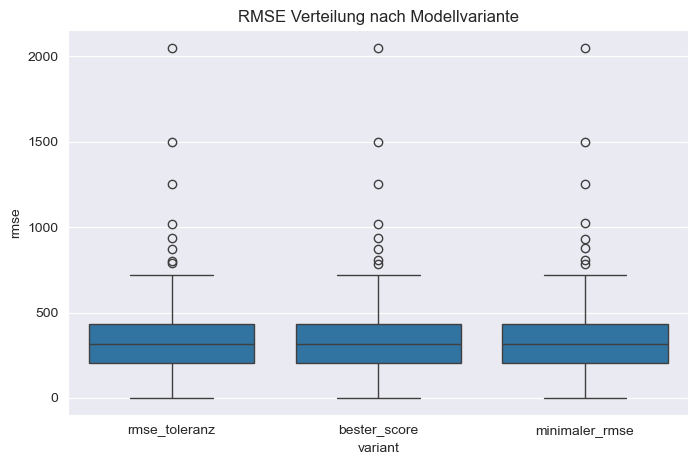

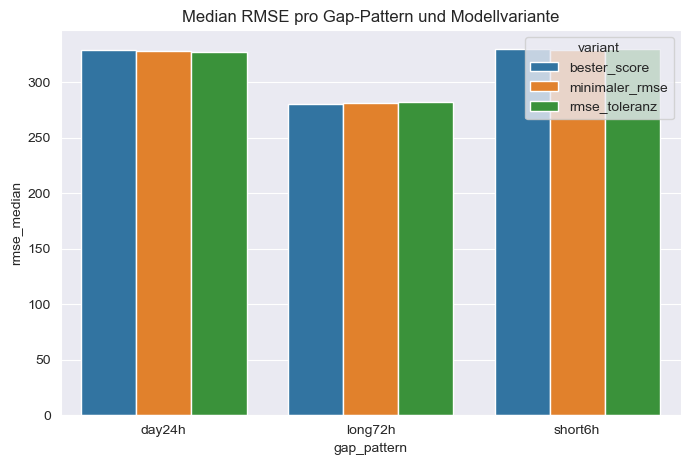

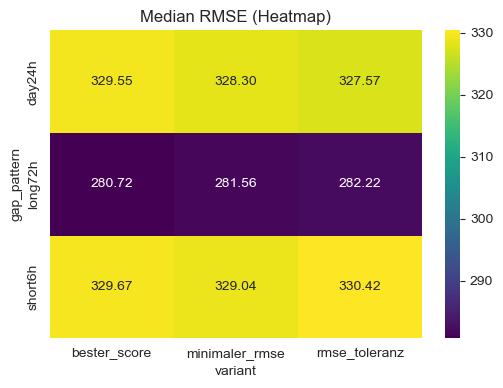

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/experiment_results/experiment_summary.csv")

# Boxplot: RMSE nach Modellvariante
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="variant", y="rmse")
plt.title("RMSE Verteilung nach Modellvariante")
plt.show()

# Grouped Barplot: median RMSE pro Gap-Pattern + Modell
pivot = (
    df.groupby(["gap_pattern","variant"])
      .agg(rmse_median=("rmse","median"))
      .reset_index()
)
plt.figure(figsize=(8,5))
sns.barplot(data=pivot, x="gap_pattern", y="rmse_median", hue="variant")
plt.title("Median RMSE pro Gap-Pattern und Modellvariante")
plt.show()

# Heatmap
heat = pivot.pivot(index="gap_pattern", columns="variant", values="rmse_median")
plt.figure(figsize=(6,4))
sns.heatmap(heat, annot=True, fmt=".2f", cmap="viridis")
plt.title("Median RMSE (Heatmap)")
plt.show()